<a href="https://colab.research.google.com/github/Jun-prog/Kaggle_HousePrices_Prediction/blob/development_junya/10_9_%E6%94%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd "/content/drive/My Drive/Kaggle_HousePrices_Prediction/notebooks"

/content/drive/My Drive/Kaggle_HousePrices_Prediction/notebooks


ライブラリの準備

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso
)
%matplotlib inline

In [ ]:
# データの読み込み
train = pd.read_csv('../dataset/train.csv') #訓練データ
test = pd.read_csv('../dataset/test.csv') #テストデータ
# 学習データとテストデータのマージ
train['WhatIsData'] = 'Train'
test['WhatIsData'] = 'Test'
test['SalePrice'] = 9999999999
alldata = pd.concat([train,test],axis=0).reset_index(drop=True)
print('The size of train is : ' + str(train.shape))
print('The size of test is : ' + str(test.shape))
print(alldata)

The size of train is : (1460, 82)
The size of test is : (1459, 82)
        Id  MSSubClass MSZoning  ...  SaleCondition   SalePrice WhatIsData
0        1          60       RL  ...         Normal      208500      Train
1        2          20       RL  ...         Normal      181500      Train
2        3          60       RL  ...         Normal      223500      Train
3        4          70       RL  ...        Abnorml      140000      Train
4        5          60       RL  ...         Normal      250000      Train
...    ...         ...      ...  ...            ...         ...        ...
2914  2915         160       RM  ...         Normal  9999999999       Test
2915  2916         160       RM  ...        Abnorml  9999999999       Test
2916  2917          20       RL  ...        Abnorml  9999999999       Test
2917  2918          85       RL  ...         Normal  9999999999       Test
2918  2919          60       RL  ...         Normal  9999999999       Test

[2919 rows x 82 columns]


外れ値の削除

In [ ]:
# 相関の高めの変数　トップ10　0.5
features_columns_name = ['OverallQual', 'GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','SalePrice']

alldata = alldata[features_columns_name]
print(alldata)

      OverallQual  GrLivArea  GarageCars  ...  YearBuilt  YearRemodAdd   SalePrice
0               7       1710         2.0  ...       2003          2003      208500
1               6       1262         2.0  ...       1976          1976      181500
2               7       1786         2.0  ...       2001          2002      223500
3               7       1717         3.0  ...       1915          1970      140000
4               8       2198         3.0  ...       2000          2000      250000
...           ...        ...         ...  ...        ...           ...         ...
2914            4       1092         0.0  ...       1970          1970  9999999999
2915            4       1092         1.0  ...       1970          1970  9999999999
2916            5       1224         2.0  ...       1960          1996  9999999999
2917            5        970         0.0  ...       1992          1992  9999999999
2918            7       2000         3.0  ...       1993          1994  9999999999

[29

      OverallQual  GrLivArea  GarageCars  ...  YearBuilt  YearRemodAdd  SalePrice
0               7       1710           2  ...       2003          2003     208500
1               6       1262           2  ...       1976          1976     181500
2               7       1786           2  ...       2001          2002     223500
3               7       1717           3  ...       1915          1970     140000
4               8       2198           3  ...       2000          2000     250000
...           ...        ...         ...  ...        ...           ...        ...
1455            6       1647           2  ...       1999          2000     175000
1456            6       2073           2  ...       1978          1988     210000
1457            7       2340           1  ...       1941          2006     266500
1458            5       1078           1  ...       1950          1996     142125
1459            5       1256           1  ...       1965          1965     147500

[1460 rows x 11

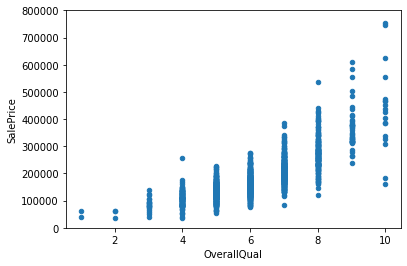

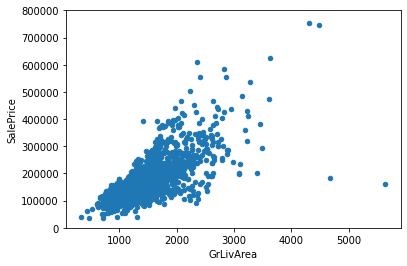

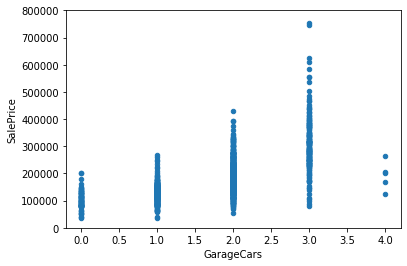

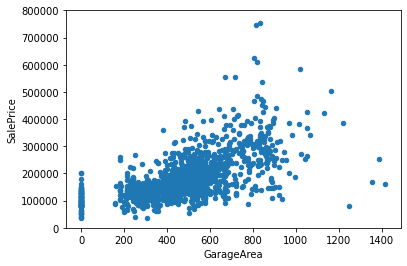

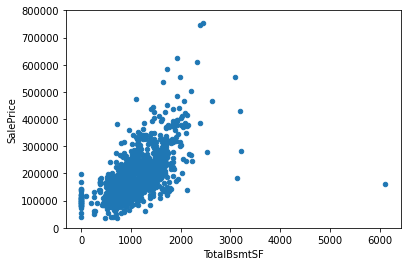

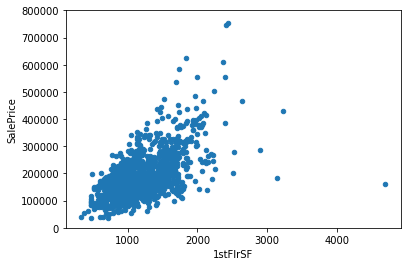

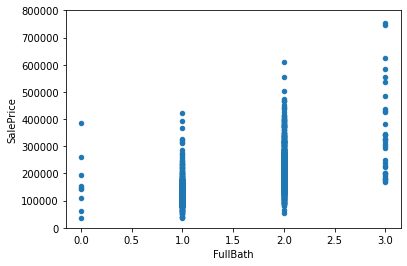

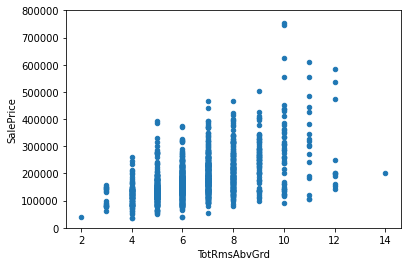

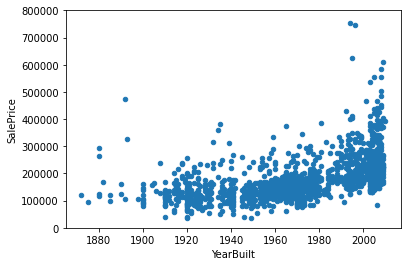

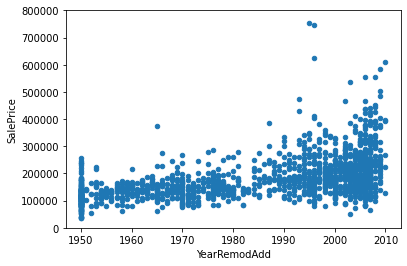

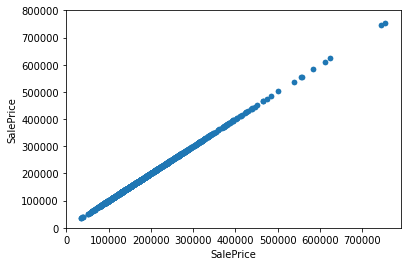

In [ ]:
print(train[features_columns_name])

# bivariate analysis saleprice/grlivarea
for var in features_columns_name:
  data = pd.concat([train['SalePrice'], train[var]], axis=1)
  data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));


In [ ]:
# 学習データの欠損状況の確認
print("学習データの欠損状況")
for var in features_columns_name:
  print(var , ":" ,train[var].isnull().sum())
print(" ")

# テストデータの欠損状況の確認
print("テストデータの欠損状況")
for var in features_columns_name:
  print(var , ":" ,test[var].isnull().sum())
print(" ")




学習データの欠損状況
OverallQual : 0
GrLivArea : 0
GarageCars : 0
GarageArea : 0
TotalBsmtSF : 0
1stFlrSF : 0
FullBath : 0
TotRmsAbvGrd : 0
YearBuilt : 0
YearRemodAdd : 0
SalePrice : 0
 
テストデータの欠損状況
OverallQual : 0
GrLivArea : 0
GarageCars : 1
GarageArea : 1
TotalBsmtSF : 1
1stFlrSF : 0
FullBath : 0
TotRmsAbvGrd : 0
YearBuilt : 0
YearRemodAdd : 0
SalePrice : 0
 


欠損値の補完

In [ ]:
# 学習データの欠損状況
train.isnull().sum()[train.isnull().sum()>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [ ]:
# テストデータの欠損状況
test.isnull().sum()[test.isnull().sum()>0].sort_values(ascending=False)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64

欠損している変数が数値型なのかカテゴリカル変数なのかを把握するために、データ型も確認しておく。

In [ ]:
# top11data カラムのデータ型を確認
alldata[features_columns_name].dtypes.sort_values() #データ型

OverallQual       int64
GrLivArea         int64
1stFlrSF          int64
FullBath          int64
TotRmsAbvGrd      int64
YearBuilt         int64
YearRemodAdd      int64
SalePrice         int64
GarageCars      float64
GarageArea      float64
TotalBsmtSF     float64
dtype: object

In [ ]:
# データ型に応じて欠損値を補完する
# floatの場合は0
# objectの場合は'NA'
print(alldata)
na_float_cols = alldata.dtypes[alldata.dtypes=='float64'].index.tolist() #float64
na_obj_cols = alldata.dtypes[alldata.dtypes=='object'].index.tolist() #object
# float64型で欠損している場合は0を代入
for na_float_col in na_float_cols:
    alldata.loc[alldata[na_float_col].isnull(),na_float_col] = 0.0
# object型で欠損している場合は'NA'を代入
for na_obj_col in na_obj_cols:
    alldata.loc[alldata[na_obj_col].isnull(),na_obj_col] = 'NA'

      OverallQual  GrLivArea  GarageCars  ...  YearBuilt  YearRemodAdd   SalePrice
0               7       1710         2.0  ...       2003          2003      208500
1               6       1262         2.0  ...       1976          1976      181500
2               7       1786         2.0  ...       2001          2002      223500
3               7       1717         3.0  ...       1915          1970      140000
4               8       2198         3.0  ...       2000          2000      250000
...           ...        ...         ...  ...        ...           ...         ...
2914            4       1092         0.0  ...       1970          1970  9999999999
2915            4       1092         1.0  ...       1970          1970  9999999999
2916            5       1224         2.0  ...       1960          1996  9999999999
2917            5        970         0.0  ...       1992          1992  9999999999
2918            7       2000         3.0  ...       1993          1994  9999999999

[29

In [ ]:
# マージデータの欠損状況
alldata.isnull().sum()[alldata.isnull().sum()>0].sort_values(ascending=False)
#マージデータの欠損を確認し、全て補完されていることを確認

Series([], dtype: int64)

In [ ]:
# カテゴリカル変数の特徴量をリスト化
cat_cols = alldata.dtypes[alldata.dtypes=='object'].index.tolist()
# 数値変数の特徴量をリスト化
num_cols = alldata.dtypes[alldata.dtypes!='object'].index.tolist()
# データ分割および提出時に必要なカラムをリスト化
other_cols = ['Id', 'WhatIsData']
# 余計な要素をリストから削除
cat_cols.remove('WhatIsData') #学習データ・テストデータ区別フラグ除去
num_cols.remove('Id') # Id削除
# カテゴリカル変数をダミー化
alldata_cat = pd.get_dummies(alldata[cat_cols])
# データ統合
all_data = pd.concat([alldata[other_cols], alldata[num_cols],alldata_cat],axis=1)

ValueError: ignored

目的変数の分布変換

In [ ]:
sns.distplot(train['SalePrice'])

In [ ]:
対数変換をすることで正規分布に近づける！！

In [ ]:
# 対数変換をすることで正規分布に近づける！！
sns.distplot(np.log(train['SalePrice']))

予測モデルの構築

In [ ]:
# 今回は変数量がかなり多いため、係数に強力なペナルティをかけたいのでLasso回帰を使って予測モデルを構築
print(alldata)
# マージデータを学習データとテストデータに分割
train_ = all_data[all_data['WhatIsData']=='Train'].drop(['WhatIsData','Id'], axis=1).reset_index(drop=True)
test_ = all_data[all_data['WhatIsData']=='Test'].drop(['WhatIsData','SalePrice'], axis=1).reset_index(drop=True)
# 学習データ内の分割
train_x = train_.drop('SalePrice',axis=1)
train_y = np.log(train_['SalePrice'])
# テストデータ内の分割
test_id = test_['Id']
test_data = test_.drop('Id',axis=1)


      OverallQual  GrLivArea  GarageCars  ...  YearBuilt  YearRemodAdd   SalePrice
0               7       1710         2.0  ...       2003          2003      208500
1               6       1262         2.0  ...       1976          1976      181500
2               7       1786         2.0  ...       2001          2002      223500
3               7       1717         3.0  ...       1915          1970      140000
4               8       2198         3.0  ...       2000          2000      250000
...           ...        ...         ...  ...        ...           ...         ...
2914            4       1092         0.0  ...       1970          1970  9999999999
2915            4       1092         1.0  ...       1970          1970  9999999999
2916            5       1224         2.0  ...       1960          1996  9999999999
2917            5        970         0.0  ...       1992          1992  9999999999
2918            7       2000         3.0  ...       1993          1994  9999999999

[29

In [ ]:
scaler = StandardScaler()
param_grid = [0.001, 0.01, 0.1, 1.0, 10.0,100.0,1000.0] #パラメータグリッド
cnt = 0

for alpha in param_grid:
    ls = Lasso(alpha=alpha) # Lasso回帰モデル
    pipeline = make_pipeline(scaler, ls) # パイプライン生成
    X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size= 0.3, random_state=0)
    pipeline.fit(X_train, y_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test)))

    if cnt == 0:
        best_score = test_rmse
        best_estimator = pipeline
        best_param = alpha
    
    elif best_score > test_rmse:
        best_score = test_rmse
        best_estimator = pipeline
        best_param = alpha
    else:
        pass
    
    cnt = cnt + 1


print('alpha : ' + str(best_param))
print('test score is : ' +str(best_score))
    
    
    

      MSSubClass  LotFrontage  ...  SaleCondition_Normal  SaleCondition_Partial
0             60         65.0  ...                     1                      0
1             20         80.0  ...                     1                      0
2             60         68.0  ...                     1                      0
3             70         60.0  ...                     0                      0
4             60         84.0  ...                     1                      0
...          ...          ...  ...                   ...                    ...
1455          60         62.0  ...                     1                      0
1456          20         85.0  ...                     1                      0
1457          70         66.0  ...                     1                      0
1458          20         68.0  ...                     1                      0
1459          20         75.0  ...                     1                      0

[1460 rows x 311 columns]
alpha : 0.01


In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()
param_grid = [0.001, 0.01, 0.1, 1.0, 10.0,100.0,1000.0] #パラメータグリッド
cnt = 0

lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size= 0.2, random_state=0)
lr.fit(X_train, y_train)
predicted_lr_train = lr.predict(X_train)
predicted_lr_test = lr.predict(X_test)


print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, predicted_lr_train), mean_squared_error(y_test, predicted_lr_test)) )
#print('alpha : ' + str(best_param))
#print('test score is : ' +str(np.exp(best_score)))

MSE train : 0.008, test : 0.055


Lassoのパラメータα=0.01のときに汎化性能が0.18になることがわかりました。
ちなみに汎化性能は予測結果および教師データに自然対数をかけたものに対し、
RMSE(root mean square error)を使って算出しています。

モデルの検証

学習したモデルが実際に教師データにどれくらい近似できているのかを検証してみます。
横軸が教師データ、縦軸が予測結果としてデータを散布します。

In [ ]:
plt.subplots_adjust(wspace=0.4)
plt.subplot(121)
plt.scatter(np.exp(y_train),np.exp(best_estimator.predict(X_train)))
plt.subplot(122)
plt.scatter(np.exp(y_test),np.exp(best_estimator.predict(X_test)))

In [ ]:
左が学習データ、右がテストデータになります。
学習データに対してはそこそこフィットしてますが、テストデータにはフィットしていないようです。
外れ値、過学習、特徴量エンジニアリング不足などなど課題は山積ですが、いったん先へ進みます。

In [ ]:
予測結果の提出
最後に学習データ全体を使って予測モデルを再構築して予測結果を出力します。
ここで予測結果のSalePrice(住宅価格)は対数をとった値なので、最終的にはexponentialをかけてあげる必要があります。

In [ ]:
# 提出用データ生成
# test_id
ls = Lasso(alpha = 0.01)
pipeline = make_pipeline(scaler, ls)
pipeline.fit(train_x,train_y)
test_SalePrice = pd.DataFrame(np.exp(pipeline.predict(test_data)),columns=['SalePrice'])
test_Id = pd.DataFrame(test_id,columns=['Id'])
pd.concat([test_Id, test_SalePrice],axis=1).to_csv('../result/Lasso_alpha_0.01.csv',index=False)